In [120]:
from PIL import Image
import numpy as np
import os
import scipy
from scipy import ndimage
import warnings,glob
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    %matplotlib nbagg
    import matplotlib.pyplot as plt
    import matplotlib
files = glob.glob("/Users/rein/Desktop/remote_june_3/m13/resize_capt_multi_*.jpg")
files += glob.glob("/Users/rein/Desktop/remote_june_3/m13_2/resize_capt_multi_*.jpg")

<IPython.core.display.Javascript object>


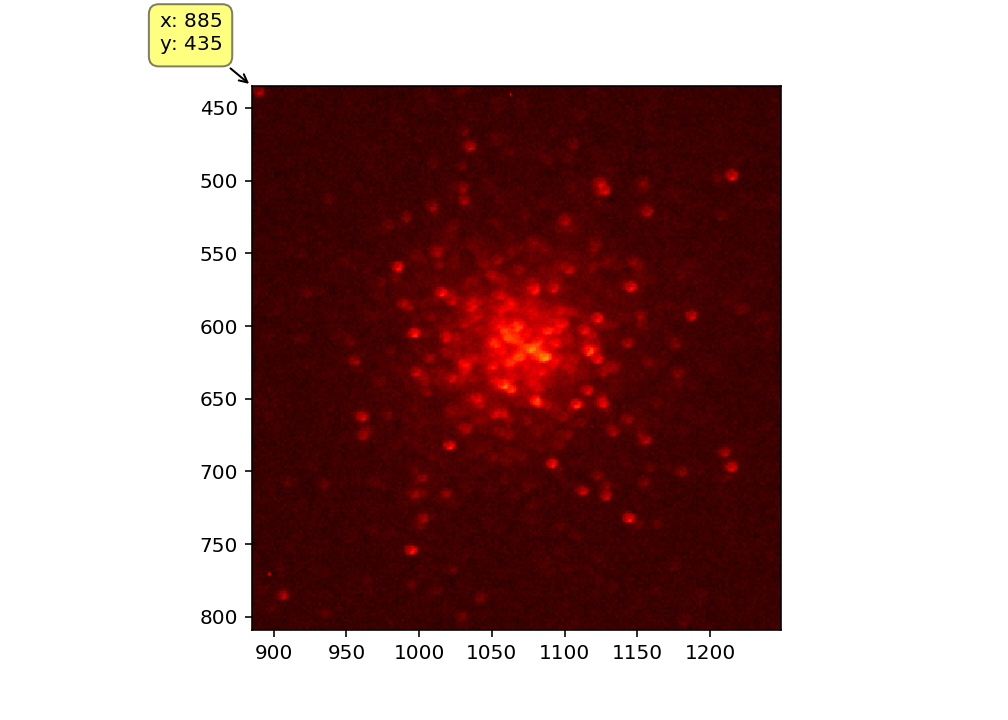

In [133]:
f = files[0]
refi = np.average(np.array(Image.open(f), dtype=np.float32),axis=2)
fig, ax = plt.subplots(figsize=(7,5))
ax.imshow(refi, cmap="hot")
dc = datacursor(ax)

In [122]:
for k in dc.annotations:
    ry, rx = dc.annotations[k].xy
    print(rx, ry)

506.91781874 373.203917051


In [123]:
def cmask(x,y,radius,shape):
    nx,ny = shape
    y,x = np.ogrid[-x:nx-x,-y:ny-y]
    mask = x*x + y*y >= radius*radius
    return mask
mask = cmask(rx,ry,150,refi.shape)

In [124]:
blurred = scipy.ndimage.filters.gaussian_filter(refi, sigma=10)
am = np.argmax(np.ma.masked_array(blurred,mask))
refx, refy = np.unravel_index(am,refi.shape)
print(refx,refy)

501 366


In [131]:
s = refi.copy()
k = 0 
for f in files[1:]:
    i = np.average(np.array(Image.open(f), dtype=np.float32),axis=2)
    blurred = scipy.ndimage.filters.gaussian_filter(i, sigma=10)
    am = np.argmax(np.ma.masked_array(blurred,mask))
    ix, iy = np.unravel_index(am,i.shape)
    print(ix-refx,iy-refy)
    i = np.roll(i,-iy+refy,axis=1)
    i = np.roll(i,-ix+refx,axis=0)
        

    s += i
    k += 1

1 0
1 0
2 0
2 0
3 0
3 0
3 0
4 -1
4 -1
12 -4
12 -4
12 -4
13 -4
13 -5
14 -5
14 -4
15 -5
15 -5
15 -5


<IPython.core.display.Javascript object>


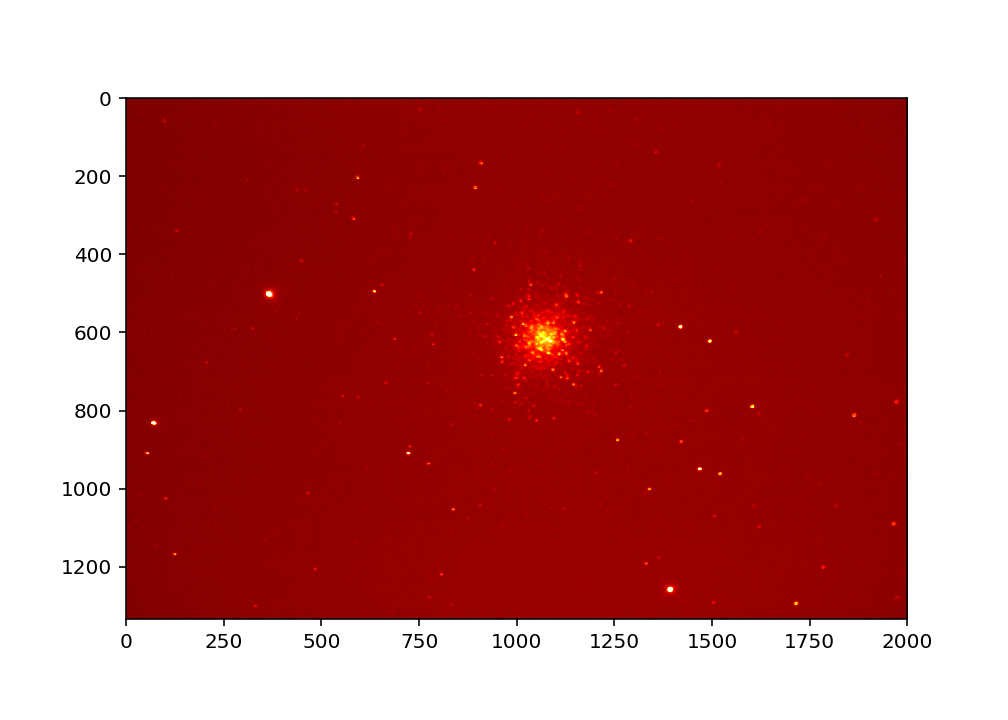

In [138]:
fig, ax = plt.subplots(figsize=(7,5))
ax.imshow(s, vmin=0,vmax=3000, cmap="hot")

In [139]:
scipy.misc.toimage(s, cmin=0.0, cmax=3000.).save('stacked.jpg')
